In [41]:
import pandas as pd
import numpy as np
import gensim
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import stop_words
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./data/combined.csv')
sandy = pd.read_csv('./data/sandy_clean_binary.csv')
oklahoma = pd.read_csv('./data/oklahoma_clean_binary.csv')
abflood = pd.read_csv('./data/abflood_clean_binary.csv')
qlflood = pd.read_csv('./data/qlflood_clean_binary.csv')

In [3]:
df.head()

,id,tweet,label,disaster
0,'262596552399396864',i ve got enough candles to supply a mexican fa...,0,hurricane
1,'263044104500420609',sandy be soooo mad that she be shattering our ...,1,hurricane
2,'263309629973491712',ibexgirl thankfully hurricane waugh played it ...,0,hurricane
3,'263422851133079552',taos you never got that magnificent case of bu...,0,hurricane
4,'262404311223504896',i m at mad river bar grille new york ny,0,hurricane


In [4]:
# Pre-Processing function from https://github.com/cameronbronstein/Project-4-New-Light-Technologies-Client-Project/blob/master/2%20-%20NLP_Urgency_Classification.ipynb
# This is a text preprocessing function that get our data ready for modeling, creating new columns 
# for the message text in their tokenized, lemmatized, and stemmed forms. This allows for easy selection
# of different forms of the text for use in vectorization and modeling.

def preprocessed_columns(dataframe = df, 
                        column = 'tweet', 
                        new_lemma_column = 'lemmatized', 
                        new_stem_column = 'stemmed',
                        new_token_column = 'tokenized',
                        regular_expression = r'\w+'): 
    
    tokenizer = RegexpTokenizer(regular_expression)      #Instantiate tokenizer with specific regular expression
    lemmatizer = WordNetLemmatizer()                     #Instantiate lemmatizer
    stemmer = PorterStemmer()                            #Instantiate stemmer
    
    lemmatized = []                                      #list to append lemmatized data
    stemmed = []                                         #list to append stemmed words
    tokenized = []
    
    
    for i in dataframe[column]:                          #Iterate through all the rows in specific column

        tokens = tokenizer.tokenize(i.lower())           #Converting string titles to tokens 
        tokenized.append(tokens)

        lemma = [lemmatizer.lemmatize(token) for token in tokens]     #lemmatizing all tokens
        lemmatized.append(lemma)                                      #appending lemma to lemmatized list

        stems = [stemmer.stem(token) for token in tokens]             #stemming all tokens
        stemmed.append(stems)                                         #creating stem list
     
    dataframe[new_token_column] = [' '.join(i) for i in tokenized]    
    dataframe[new_lemma_column] = [' '.join(i) for i in lemmatized]   #rejoing the lists for each title
    dataframe[new_stem_column] = [' '.join(i) for i in stemmed]       #setting results to be new columns in df   
    
    return dataframe

In [5]:
processed = preprocessed_columns()

In [6]:
processed.head()

,id,tweet,label,disaster,tokenized,lemmatized,stemmed
0,'262596552399396864',i ve got enough candles to supply a mexican fa...,0,hurricane,i ve got enough candles to supply a mexican fa...,i ve got enough candle to supply a mexican family,i ve got enough candl to suppli a mexican famili
1,'263044104500420609',sandy be soooo mad that she be shattering our ...,1,hurricane,sandy be soooo mad that she be shattering our ...,sandy be soooo mad that she be shattering our ...,sandi be soooo mad that she be shatter our doo...
2,'263309629973491712',ibexgirl thankfully hurricane waugh played it ...,0,hurricane,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thank hurrican waugh play it cool and...
3,'263422851133079552',taos you never got that magnificent case of bu...,0,hurricane,taos you never got that magnificent case of bu...,tao you never got that magnificent case of bur...,tao you never got that magnific case of burgun...
4,'262404311223504896',i m at mad river bar grille new york ny,0,hurricane,i m at mad river bar grille new york ny,i m at mad river bar grille new york ny,i m at mad river bar grill new york ny


In [7]:
sandy_p = preprocessed_columns(dataframe = sandy)
oklahoma_p = preprocessed_columns(dataframe = oklahoma)
abflood_p = preprocessed_columns(dataframe = abflood)
qlflood_p = preprocessed_columns(dataframe = oklahoma)

In [32]:
df['label'].value_counts()

1    21568
0    18496
Name: label, dtype: int64

# Word Count Visualization

## Combined Tweets

### Tokenized

In [8]:
cv = CountVectorizer(stop_words = 'english',
                     ngram_range = (1,2),
                     min_df = 25,
                     max_df = .95)

In [9]:
cv_df_token = pd.SparseDataFrame(cv.fit_transform(processed['tokenized']), 
                           columns = cv.get_feature_names())
cv_df_token.fillna(0, inplace=True)

In [10]:
cv_df_token.head()

,00,00 humidity,000,000 help,000 homes,000 people,10,10 donation,10 online,100,...,yycflood,yycflood abflood,yycflood relief,yycflood yyc,yycflood yychelps,yycfloods,yychelps,yychelps yycflood,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


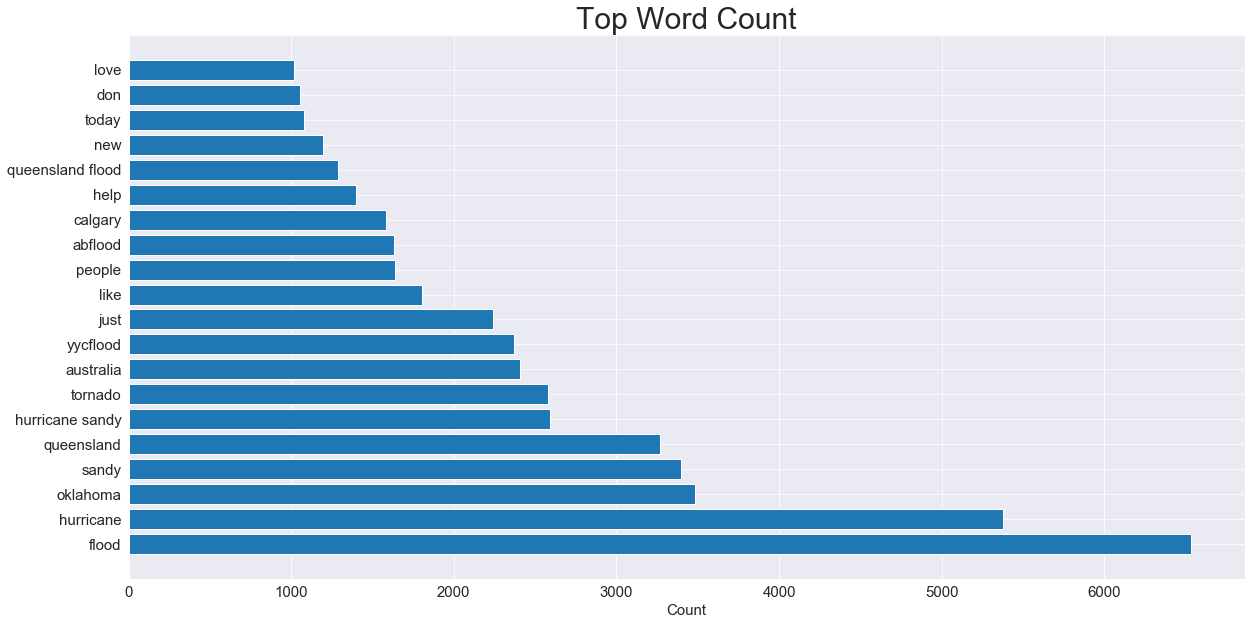

In [11]:
plt.figure(figsize=(20, 10))
plt.barh(y = cv_df_token.sum().sort_values(ascending=False).head(20).index,
         width = cv_df_token.sum().sort_values(ascending=False).head(20))
plt.title('Top Word Count', fontsize=30)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [50]:
df_ontopic = processed[processed['label'] == 1]
df_offtopic = processed[processed['label'] == 0]

print(df_ontopic.shape)
print(df_offtopic.shape)

(21568, 7)
(18496, 7)


In [13]:
cv_dfontopic_token = pd.SparseDataFrame(cv.fit_transform(df_ontopic['tokenized']), 
                                        columns = cv.get_feature_names())
cv_dfontopic_token.fillna(0, inplace=True)

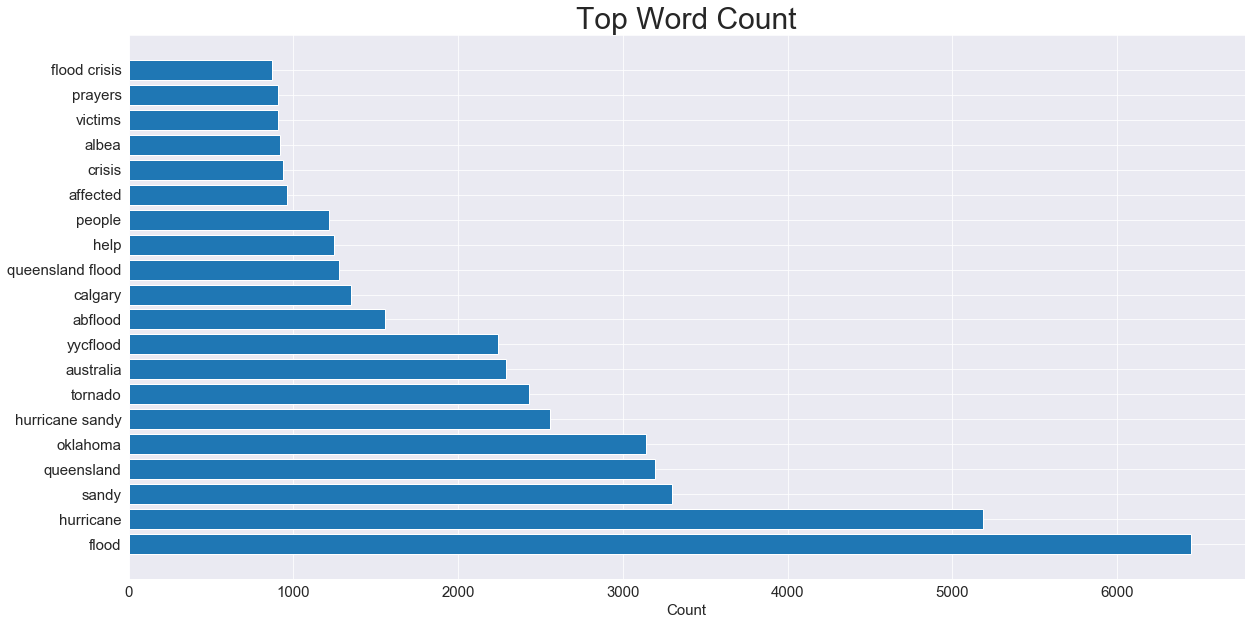

In [14]:
plt.figure(figsize=(20, 10))
plt.barh(y = cv_dfontopic_token.sum().sort_values(ascending=False).head(20).index,
         width = cv_dfontopic_token.sum().sort_values(ascending=False).head(20))
plt.title('Top Word Count', fontsize=30)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Lemmatized

In [15]:
cv_lem = CountVectorizer(stop_words = 'english',
                         ngram_range = (1,2),
                         min_df = 25,
                         max_df = .95)

In [16]:
cv_df_lem = pd.SparseDataFrame(cv_lem.fit_transform(processed['lemmatized']),
                               columns = cv_lem.get_feature_names())
cv_df_lem.fillna(0, inplace=True)

In [17]:
cv_df_lem.head()

,00,00 humidity,000,000 help,000 home,000 people,10,10 donation,10 online,100,...,yycflood,yycflood abflood,yycflood relief,yycflood yyc,yycflood yychelps,yycfloods,yychelps,yychelps yycflood,zone,zoo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


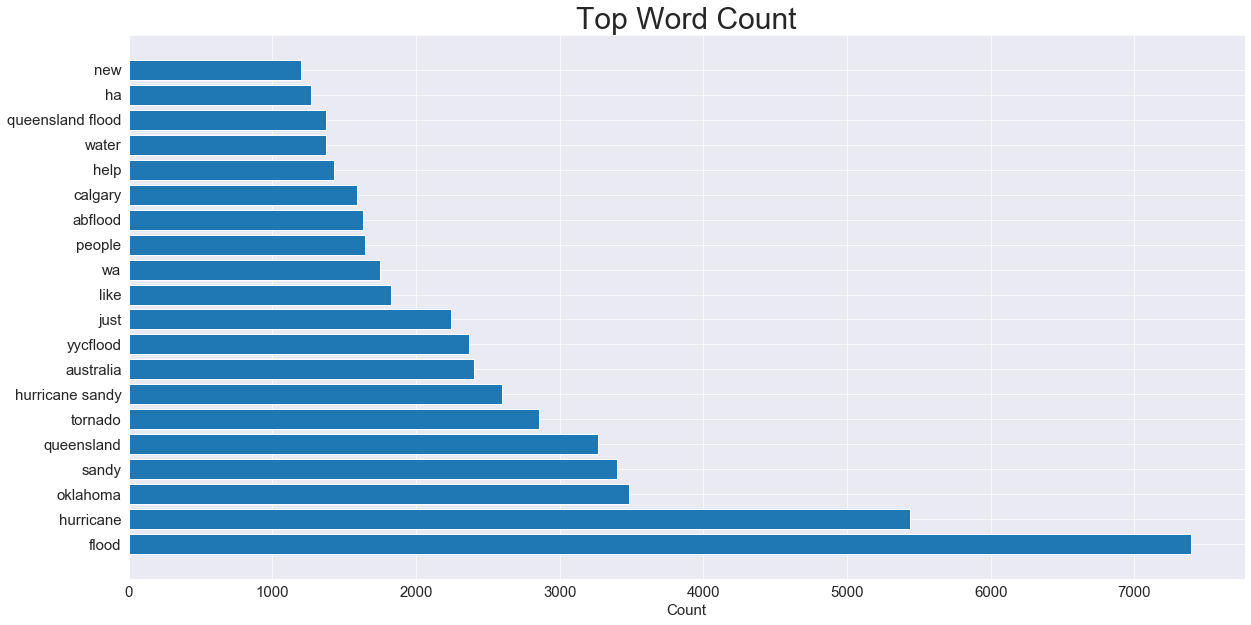

In [18]:
plt.figure(figsize=(20, 10))
plt.barh(y = cv_df_lem.sum().sort_values(ascending=False).head(20).index,
         width = cv_df_lem.sum().sort_values(ascending=False).head(20))
plt.title('Top Word Count', fontsize=30)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

### Stemmed

In [19]:
cv_stem = CountVectorizer(stop_words = 'english',
                          ngram_range = (1,2),
                          min_df = 25,
                          max_df = .95)

In [20]:
cv_df_stem = pd.SparseDataFrame(cv_stem.fit_transform(processed['stemmed']),
                                columns = cv_stem.get_feature_names())
cv_df_stem.fillna(0, inplace=True)

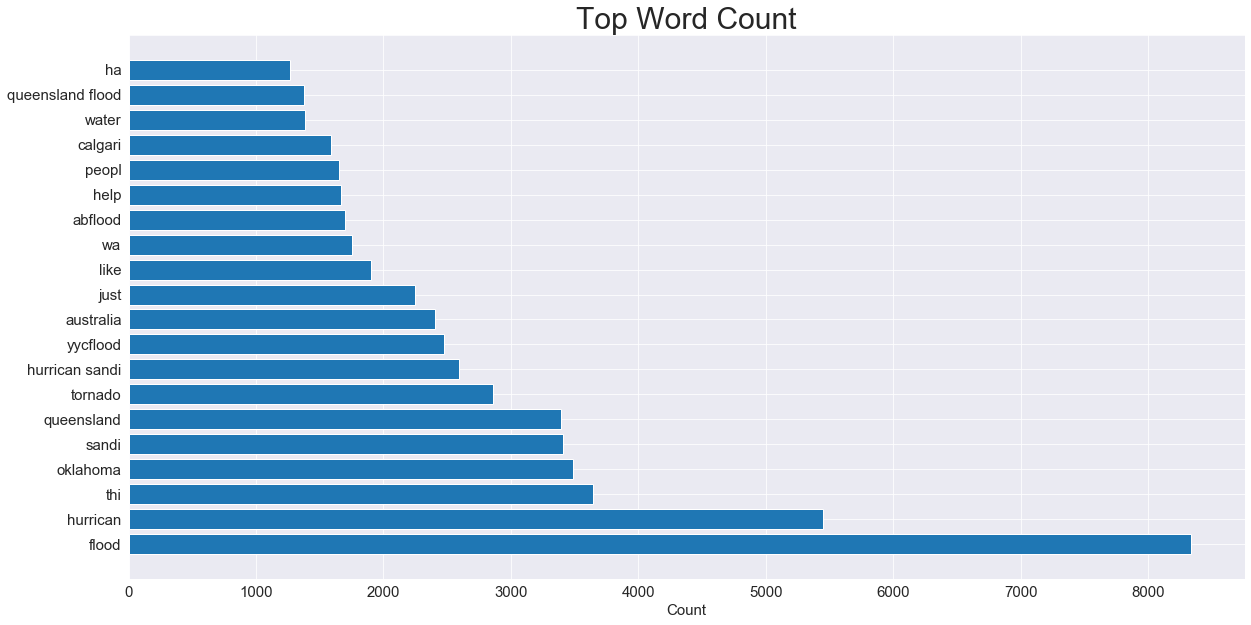

In [21]:
plt.figure(figsize=(20, 10))
plt.barh(y = cv_df_stem.sum().sort_values(ascending=False).head(20).index,
         width = cv_df_stem.sum().sort_values(ascending=False).head(20))
plt.title('Top Word Count', fontsize=30)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

## Sandy Tweets

In [22]:
sandy_ontopic = sandy_p[sandy['label'] == 1]

In [23]:
sandy_cv_df_token = pd.SparseDataFrame(cv.fit_transform(sandy_p['tokenized']),
                                       columns = cv.get_feature_names())
sandy_cv_df_token.fillna(0, inplace=True)

In [24]:
sandy_cv_df_token.head()

,000,000 help,10,100,100 retweets,11,2012,30,65,65 victims,...,yeah,year,years,yes,yesterday,yo,york,york city,york ny,zone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


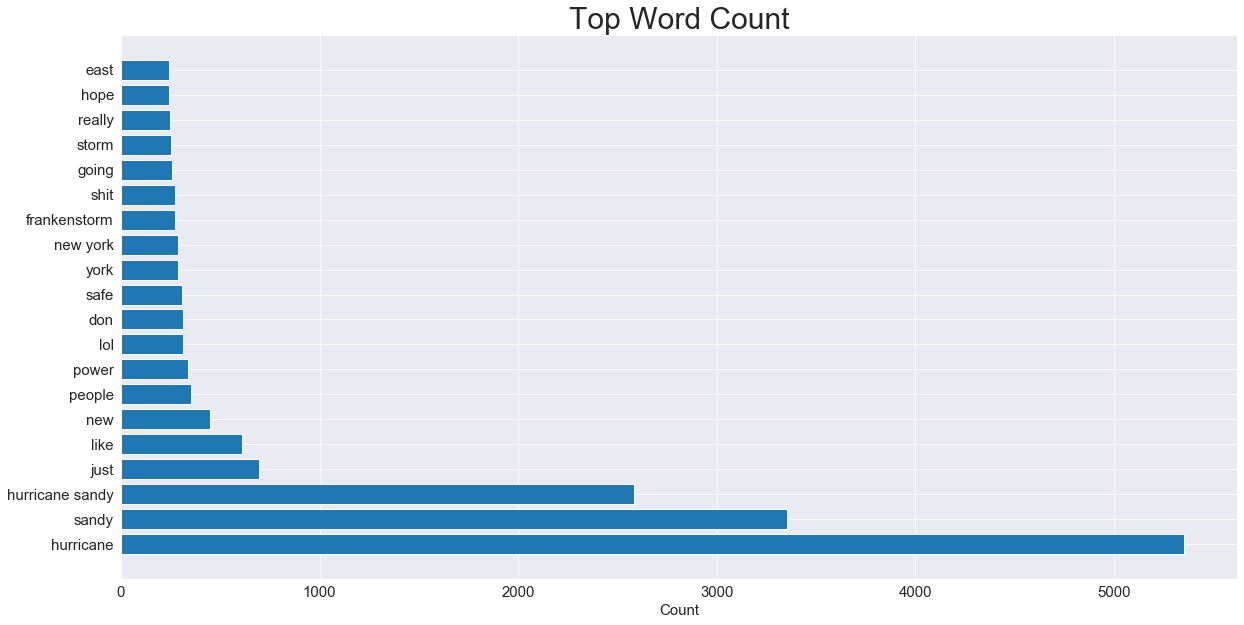

In [25]:
plt.figure(figsize=(20, 10))
plt.barh(y = sandy_cv_df_token.sum().sort_values(ascending=False).head(20).index,
         width = sandy_cv_df_token.sum().sort_values(ascending=False).head(20))
plt.title('Top Word Count', fontsize=30)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [26]:
sandyontopic_cv_df_token = pd.SparseDataFrame(cv.fit_transform(sandy_ontopic['tokenized']),
                                              columns = cv.get_feature_names())
sandyontopic_cv_df_token.fillna(0, inplace=True)

In [27]:
sandyontopic_cv_df_token.head()

,000,000 help,10,100,100 retweets,2012,30,65,65 victims,accounts,...,work,world,worried,worse,worst,wouldn,wow,yo,york,york city
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


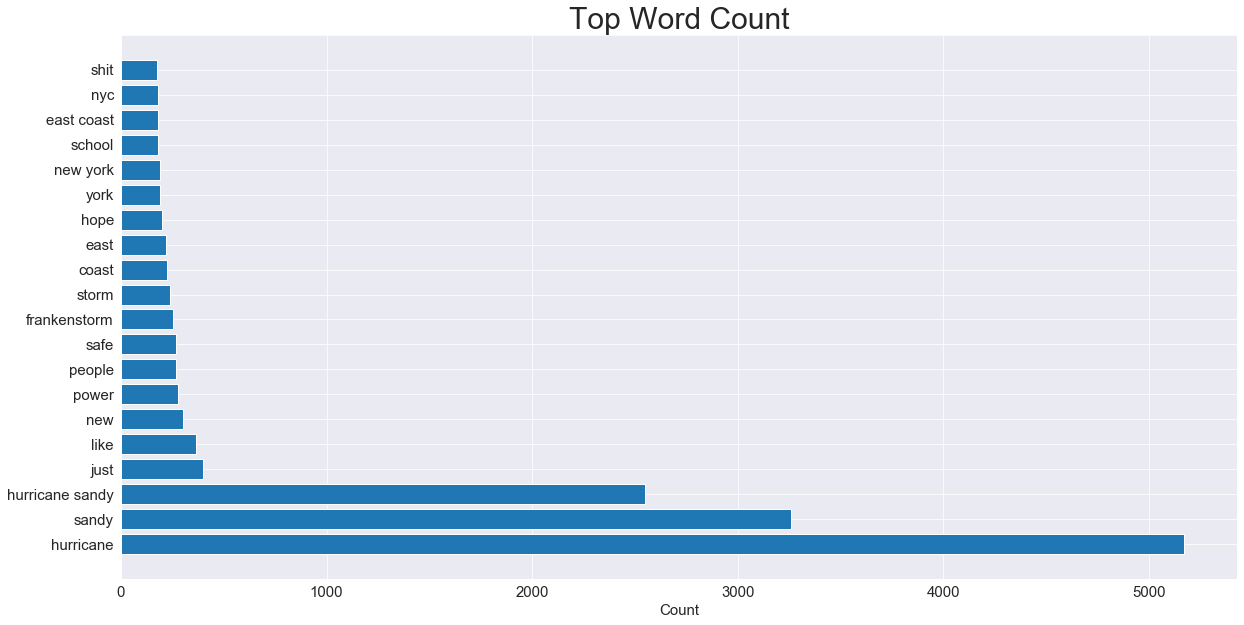

In [28]:
plt.figure(figsize=(20, 10))
plt.barh(y = sandyontopic_cv_df_token.sum().sort_values(ascending=False).head(20).index,
         width = sandyontopic_cv_df_token.sum().sort_values(ascending=False).head(20))
plt.title('Top Word Count', fontsize=30)
plt.xlabel('Count', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15);

In [ ]:
vec_mod = gensim.models.KeyedVectors.load_word2vec_format('~/Downloads/GoogleNews-vectors-negative300.bin',
                                                          binary=True)

In [34]:
english_stops = set(stopwords.words('english'))

tokenizer = RegexpTokenizer(r'\w+')

In [51]:
df_ontopic_tokens = [tokenizer.tokenize(tweet.lower()) for tweet in df_ontopic['tweet']]

In [52]:
clean_df_tweet_tokens = []
for tweet in df_ontopic_tokens:
    clean_tweet_tokens = []
    for word in tweet:
        if word not in english_stops and word not in ['@','rt', 'https', 'co', 'hurricanesandy',
                                                      'yycflood', 'abflood'] and '@' not in word:
            clean_tweet_tokens.append(word)
    clean_df_tweet_tokens.append(clean_tweet_tokens)

In [53]:
urgent = ['help', 'flood', 'leave', 'rescue', 'sos', 'come','debris', 'removal', 'property', 'tree', 
          'feet', 'creek', 'removal', 'roads', 'levees', 'unsafe', 'structures', 'river',
          'water', 'floodplains', 'critical', 'evacuation', 'shelter', 'emergency', 'transport', 'access', 
          'safe', 'rescue', 'barricades', 'fire', 'generator', 'safety', 'hazard', 'need', 'lost', 'seen',
          'missing', 'flooding', 'reach', 'trying', 'now', 'attention', 'warning', 'alert', 'paramedics',
          'police', 'injuries', 'death', 'deaths', 'dead', 'collapse', 'damage', 'loss', 'burning']

non_urgent = ['help', 'vegetation', 'mud', 'silt', 'bridge', 'waterways', 'facility', 'utilities', 
              'park', 'traffic', 'replacement', 'control', 'repairs', 'stabilization', 'remediation', 
              'surfaces', 'bases', 'shoulders', 'ditches', 'drainage', 'sidewalk', ' guardrails', 'signs', 
              'decking', 'pavement', 'channel' ,'alignment', 'irrigation', 'erosion', 'prevention', 'dams', 
              'reservoirs', 'basins ', 'canals', 'aqueducts', 'coastal', 'shoreline', 'pumping', 'building', 
              'mechanical', 'electrical', 'basement', 'painting', ' treatment', 'power', 'transmission', 
              'natural gas', 'sewage', 'permanent', 'restoration', 'communication', 'systems', 'inspection', 
              'assessment', 'beach', 'park',  'playground', 'pool', 'docks', 'golf', 'tennis', 'ball', 'port', 
              'harbor', 'fish', 'hatcheries', 'insurance', 'habitat', 'temporary', 'heat', 'cold', 'hot']

In [57]:
urgent_vect = np.zeros((1,300))
counter=0
for word in urgent:
    if word not in vec_mod.vocab:
        continue
    else:
        temp = vec_mod.word_vec(word)
        urgent_vect=urgent_vect+temp
        counter +=1

urgent_vect=urgent_vect/counter
urgent_vect=np.squeeze(urgent_vect)
    #print(urgent_vect)

In [58]:
nonurgent_vect = np.zeros((1,300))
counter=0
for word in non_urgent:
    if word not in vec_mod.vocab:
        continue
    else:
        temp = vec_mod.word_vec(word)
        nonurgent_vect=nonurgent_vect+temp
        counter +=1

nonurgent_vect=nonurgent_vect/counter
nonurgent_vect=np.squeeze(nonurgent_vect)
    #print(nonurgent_vect)

In [60]:
target = [] # WE WILL FILL THIS WITH OUR CLASSIFICATIONS FOR EACH FULL TWEET
for tweet in clean_df_tweet_tokens:
    
    counter=0
    for item in tweet:
        
        temp_vect = np.zeros((1, 300))
        if item not in vec_mod.vocab.keys(): # IF WORD NOT IN Word2Vec MODEL, IT IS NOT INCLUDED
            continue
        else:
            temp_vect = temp_vect + vec_mod.word_vec(item)
            counter += 1
    if counter==0:
        counter=1
    temp_vect = np.squeeze(temp_vect)/counter
        
        # THE BELOW STEP IS CALCULATING AND COMPARING THE COSINE SIMILARITIES. THE DOT PRODUCT IS CALCULATED
        #... FOR THE TWEET VECTOR AND THE EMERGENCY VECTOR AND FOR THE TWEET VECTOR AND THE NON-EMERGENCY
        #... VECTOR. AFTER CALCULATING THE DOT PRODUCT, WE DIVIDE BY THE ABS. VALUE OF THE TWO GIVEN VECTORS
        #... TO GET THE COSINE VALUE FOR THE ANGLE BETWEEN THE VECTORS. THE GREATER THE COSINE VALUE, THE CLOSER
        #... TWO VECTORS ARE TO ONE ANOTHER, AND TWEETS ARE ASSIGNED A CLASSIFICATION OF EMERGENCY OR NON-
        #... EMERGENCY ACCORDINGLY
    if np.dot(temp_vect, urgent_vect)/(np.linalg.norm(urgent_vect)*np.linalg.norm(temp_vect)) >= np.dot(temp_vect,nonurgent_vect)/(np.linalg.norm(nonurgent_vect)*np.linalg.norm(temp_vect)):
        target.append(2)
    else:
        target.append(1)

In [87]:
target

[1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 1,
 1,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 2,
 1,
 2,


In [63]:
len(target)

21568

In [64]:
df_ontopic['label'] = target

In [67]:
df_ontopic

,id,tweet,label,disaster,tokenized,lemmatized,stemmed
1,'263044104500420609',sandy be soooo mad that she be shattering our ...,1,hurricane,sandy be soooo mad that she be shattering our ...,sandy be soooo mad that she be shattering our ...,sandi be soooo mad that she be shatter our doo...
5,'263101347421888513',neighborly duties cory kennedy arrives to th...,2,hurricane,neighborly duties cory kennedy arrives to the ...,neighborly duty cory kennedy arrives to the re...,neighborli duti cori kennedi arriv to the resc...
7,'263298821189156865',i don t know how i m getting back to jersey si...,1,hurricane,i don t know how i m getting back to jersey si...,i don t know how i m getting back to jersey si...,i don t know how i m get back to jersey sinc t...
10,'262914476989358080',already flooded so much sandy hoboken,1,hurricane,already flooded so much sandy hoboken,already flooded so much sandy hoboken,alreadi flood so much sandi hoboken
12,'262991999911743490',on that note i pray that everyone stays safe ...,1,hurricane,on that note i pray that everyone stays safe a...,on that note i pray that everyone stay safe an...,on that note i pray that everyon stay safe and...
13,'262767536540643329',codyfinz my house is creeking does that mea...,2,hurricane,codyfinz my house is creeking does that mean s...,codyfinz my house is creeking doe that mean sh...,codyfinz my hous is creek doe that mean she s ...
18,'262653983838048256',debating going home in prep for sandy,1,hurricane,debating going home in prep for sandy,debating going home in prep for sandy,debat go home in prep for sandi
21,'262771779553087488',by 11am it s going to be 100 chance of rain ...,2,hurricane,by 11am it s going to be 100 chance of rain hu...,by 11am it s going to be 100 chance of rain hu...,by 11am it s go to be 100 chanc of rain hurric...
25,'263047213490507776',newscaster we are 5 blocks from the water fir...,2,hurricane,newscaster we are 5 blocks from the water firs...,newscaster we are 5 block from the water first...,newscast we are 5 block from the water first t...
26,'263041963757031425',it s crazy out there not gonna lie i m kind o...,2,hurricane,it s crazy out there not gonna lie i m kind of...,it s crazy out there not gonna lie i m kind of...,it s crazi out there not gonna lie i m kind of...


In [68]:
df_offtopic

,id,tweet,label,disaster,tokenized,lemmatized,stemmed
0,'262596552399396864',i ve got enough candles to supply a mexican fa...,0,hurricane,i ve got enough candles to supply a mexican fa...,i ve got enough candle to supply a mexican family,i ve got enough candl to suppli a mexican famili
2,'263309629973491712',ibexgirl thankfully hurricane waugh played it ...,0,hurricane,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thank hurrican waugh play it cool and...
3,'263422851133079552',taos you never got that magnificent case of bu...,0,hurricane,taos you never got that magnificent case of bu...,tao you never got that magnificent case of bur...,tao you never got that magnific case of burgun...
4,'262404311223504896',i m at mad river bar grille new york ny,0,hurricane,i m at mad river bar grille new york ny,i m at mad river bar grille new york ny,i m at mad river bar grill new york ny
6,'262763437325684736',and that s it until the spring,0,hurricane,and that s it until the spring,and that s it until the spring,and that s it until the spring
8,'262813023515865088',naeempeena we were asked to get off the plane ...,0,hurricane,naeempeena we were asked to get off the plane ...,naeempeena we were asked to get off the plane ...,naeempeena we were ask to get off the plane af...
9,'262998165282762752',jaytee 96 you must be crazy omg you tweeted ...,0,hurricane,jaytee 96 you must be crazy omg you tweeted so...,jaytee 96 you must be crazy omg you tweeted so...,jayte 96 you must be crazi omg you tweet somet...
11,'262574187141541888',eloreeeeeee need me to comeback and finish it ...,0,hurricane,eloreeeeeee need me to comeback and finish it ...,eloreeeeeee need me to comeback and finish it ...,eloreeeeee need me to comeback and finish it s...
14,'262984888020504578',my mom just found my little sister screaming o...,0,hurricane,my mom just found my little sister screaming o...,my mom just found my little sister screaming o...,my mom just found my littl sister scream out o...
15,'262970751861260288',frankiero droplets of water is literally fall...,0,hurricane,frankiero droplets of water is literally falli...,frankiero droplet of water is literally fallin...,frankiero droplet of water is liter fall from ...


In [81]:
df = pd.concat([df_ontopic, df_offtopic])

In [85]:
df.sort_index(inplace = True)

In [86]:
df

,id,tweet,label,disaster,tokenized,lemmatized,stemmed
0,'262596552399396864',i ve got enough candles to supply a mexican fa...,0,hurricane,i ve got enough candles to supply a mexican fa...,i ve got enough candle to supply a mexican family,i ve got enough candl to suppli a mexican famili
1,'263044104500420609',sandy be soooo mad that she be shattering our ...,1,hurricane,sandy be soooo mad that she be shattering our ...,sandy be soooo mad that she be shattering our ...,sandi be soooo mad that she be shatter our doo...
2,'263309629973491712',ibexgirl thankfully hurricane waugh played it ...,0,hurricane,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thank hurrican waugh play it cool and...
3,'263422851133079552',taos you never got that magnificent case of bu...,0,hurricane,taos you never got that magnificent case of bu...,tao you never got that magnificent case of bur...,tao you never got that magnific case of burgun...
4,'262404311223504896',i m at mad river bar grille new york ny,0,hurricane,i m at mad river bar grille new york ny,i m at mad river bar grille new york ny,i m at mad river bar grill new york ny
5,'263101347421888513',neighborly duties cory kennedy arrives to th...,2,hurricane,neighborly duties cory kennedy arrives to the ...,neighborly duty cory kennedy arrives to the re...,neighborli duti cori kennedi arriv to the resc...
6,'262763437325684736',and that s it until the spring,0,hurricane,and that s it until the spring,and that s it until the spring,and that s it until the spring
7,'263298821189156865',i don t know how i m getting back to jersey si...,1,hurricane,i don t know how i m getting back to jersey si...,i don t know how i m getting back to jersey si...,i don t know how i m get back to jersey sinc t...
8,'262813023515865088',naeempeena we were asked to get off the plane ...,0,hurricane,naeempeena we were asked to get off the plane ...,naeempeena we were asked to get off the plane ...,naeempeena we were ask to get off the plane af...
9,'262998165282762752',jaytee 96 you must be crazy omg you tweeted ...,0,hurricane,jaytee 96 you must be crazy omg you tweeted so...,jaytee 96 you must be crazy omg you tweeted so...,jayte 96 you must be crazi omg you tweet somet...


In [95]:
df['id'] = df['id'].str.replace("'", "")

In [97]:
df['id'] = df['id'].astype(int)

In [100]:
df.head(10)

,id,tweet,label,disaster,tokenized,lemmatized,stemmed
0,262596552399396864,i ve got enough candles to supply a mexican fa...,0,hurricane,i ve got enough candles to supply a mexican fa...,i ve got enough candle to supply a mexican family,i ve got enough candl to suppli a mexican famili
1,263044104500420609,sandy be soooo mad that she be shattering our ...,1,hurricane,sandy be soooo mad that she be shattering our ...,sandy be soooo mad that she be shattering our ...,sandi be soooo mad that she be shatter our doo...
2,263309629973491712,ibexgirl thankfully hurricane waugh played it ...,0,hurricane,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thankfully hurricane waugh played it ...,ibexgirl thank hurrican waugh play it cool and...
3,263422851133079552,taos you never got that magnificent case of bu...,0,hurricane,taos you never got that magnificent case of bu...,tao you never got that magnificent case of bur...,tao you never got that magnific case of burgun...
4,262404311223504896,i m at mad river bar grille new york ny,0,hurricane,i m at mad river bar grille new york ny,i m at mad river bar grille new york ny,i m at mad river bar grill new york ny
5,263101347421888513,neighborly duties cory kennedy arrives to th...,2,hurricane,neighborly duties cory kennedy arrives to the ...,neighborly duty cory kennedy arrives to the re...,neighborli duti cori kennedi arriv to the resc...
6,262763437325684736,and that s it until the spring,0,hurricane,and that s it until the spring,and that s it until the spring,and that s it until the spring
7,263298821189156865,i don t know how i m getting back to jersey si...,1,hurricane,i don t know how i m getting back to jersey si...,i don t know how i m getting back to jersey si...,i don t know how i m get back to jersey sinc t...
8,262813023515865088,naeempeena we were asked to get off the plane ...,0,hurricane,naeempeena we were asked to get off the plane ...,naeempeena we were asked to get off the plane ...,naeempeena we were ask to get off the plane af...
9,262998165282762752,jaytee 96 you must be crazy omg you tweeted ...,0,hurricane,jaytee 96 you must be crazy omg you tweeted so...,jaytee 96 you must be crazy omg you tweeted so...,jayte 96 you must be crazi omg you tweet somet...
